### About Dataset
The dataset contains photographs of three legume leaf lesion states, including 1034 images in the training set and 133 images in the calibration set, with a data size of 155 MB. the following leaf lesion states are supported to be recognized: healthy, angular_leaf_spot, and bean_rust.

In [43]:
!pip install opendatasets 

In [44]:
# import opendatasets as od
# od.download("https://www.kaggle.com/datasets/marquis03/bean-leaf-lesions-classification")

## Import Libraries

In [45]:
import torch
from torch import nn
from torch.optim import Adam
from torchvision.transforms import transforms
from torch.utils.data import DataLoader,Dataset
from torchvision import models
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from  PIL import Image
import pandas as pd
import numpy as np
import os

In [46]:
# gpu check
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Data Loading & Preprocessing

In [47]:
train_df=pd.read_csv(r"E:\AI 2025\Projects_Pytorch\Datasets\Bean Leaf Classification\train.csv")
val_df=pd.read_csv(r"E:\AI 2025\Projects_Pytorch\Datasets\Bean Leaf Classification\val.csv")

train_df["image:FILE"] = "E:/AI 2025/Projects_Pytorch/Datasets/Bean Leaf Classification/" + train_df["image:FILE"]
val_df["image:FILE"] = "E:/AI 2025/Projects_Pytorch/Datasets/Bean Leaf Classification/" + val_df["image:FILE"]

In [48]:
train_df.head()

,image:FILE,category
0,E:/AI 2025/Projects_Pytorch/Datasets/Bean Leaf...,0
1,E:/AI 2025/Projects_Pytorch/Datasets/Bean Leaf...,0
2,E:/AI 2025/Projects_Pytorch/Datasets/Bean Leaf...,0
3,E:/AI 2025/Projects_Pytorch/Datasets/Bean Leaf...,0
4,E:/AI 2025/Projects_Pytorch/Datasets/Bean Leaf...,0


In [49]:
val_df.head()

,image:FILE,category
0,E:/AI 2025/Projects_Pytorch/Datasets/Bean Leaf...,0
1,E:/AI 2025/Projects_Pytorch/Datasets/Bean Leaf...,0
2,E:/AI 2025/Projects_Pytorch/Datasets/Bean Leaf...,0
3,E:/AI 2025/Projects_Pytorch/Datasets/Bean Leaf...,0
4,E:/AI 2025/Projects_Pytorch/Datasets/Bean Leaf...,0


In [50]:
train_df["category"].unique()

array([0, 1, 2])

In [51]:
train_df["category"].value_counts()

category
2    348
1    345
0    341
Name: count, dtype: int64

In [52]:
## this help in preprocess the images all are same type and same size
transform =  transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float64)
])

In [53]:
from cProfile import label


class customImageDataset(Dataset):
    def __init__(self, dataframe,transform):
        self.dataframe=dataframe
        self.transform=transform
        self.labels=torch.tensor(dataframe["category"]).to(device)
    def __len__(self):
        return self.dataframe.shape[0]
    def __getitem__(self, index):
        img_path=self.dataframe.iloc[index,0]
        label=self.labels[index]
        image=Image.open(img_path)
        if self.transform:
            image=(self.transform(image)/255.0).to(device)
        return image, label


In [54]:
train_dataset=customImageDataset(dataframe=train_df, transform=transform)
val_dataset=customImageDataset(dataframe=val_df,transform=transform)

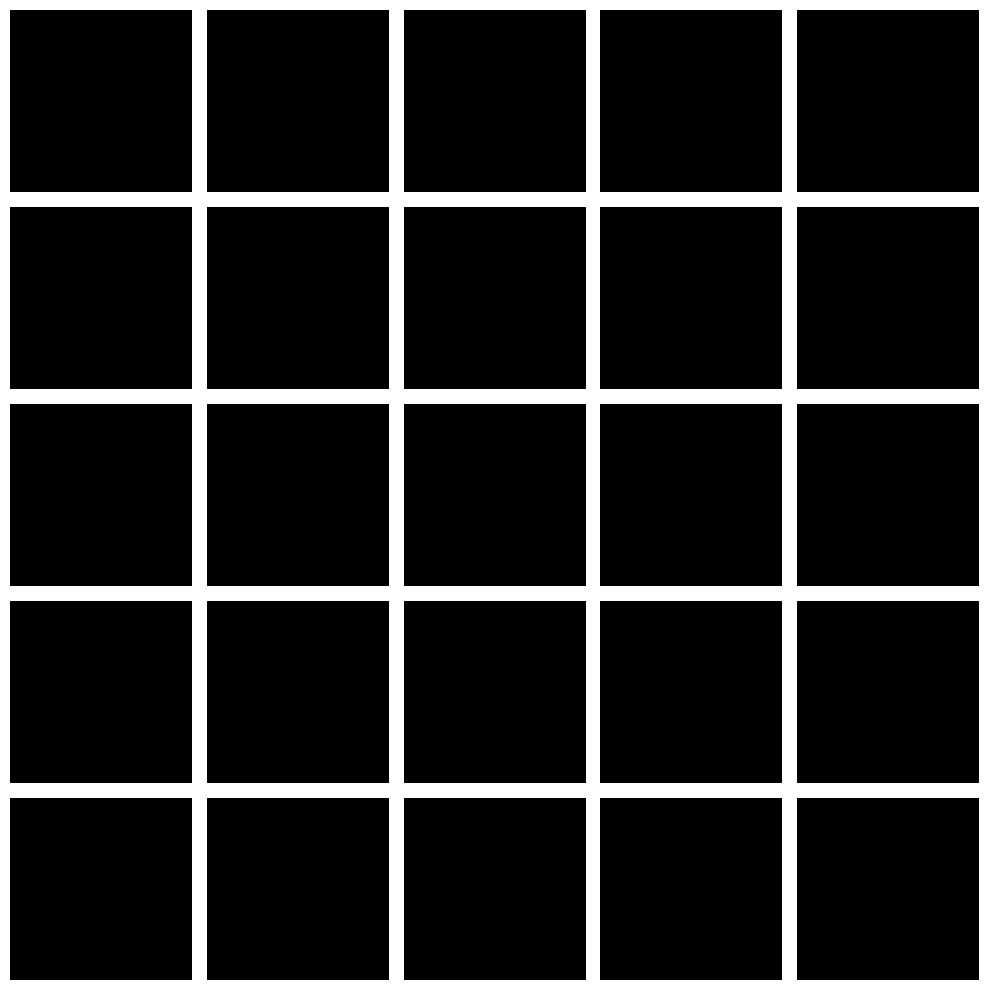

In [55]:
n_rows = 5
n_cols = 5

# Create subplots
f, axarr = plt.subplots(n_rows, n_cols, figsize=(10, 10))

for row in range(n_rows):
    for col in range(n_cols):
        idx = np.random.randint(0, len(train_dataset))
        image, _ = train_dataset[idx]  # unpack image and label if dataset returns a tuple

        if isinstance(image, torch.Tensor):
            image = image.to("cpu")  # make sure it's on CPU for plotting

        image = (image * 255.0).squeeze().permute(1, 2, 0).numpy().astype(np.uint8)
        axarr[row, col].imshow(image)
        axarr[row, col].axis("off")

plt.tight_layout()
plt.show()